# Data Analysis of IPL Matches

The dataset consist of data of IPL(Indian Premier League) cricket matches played from the year 2008 to 2017.

Objectives:

1) To find the team that won the most number of matches in a season.

2) To find the team that lost the most number of matches in a season.

3) Does winning toss increases the chances of victory.

4) To find the player with the most player of the match awards.

5) To find the city that hosted the maximum number of IPL matches.

6) To find the most winning team for each season.

7) To find the on-field umpire with the maximum number of IPL matches.


8) To find the biggest victories in IPL while defending a total and while chasing a total.

# Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
ipl = pd.read_csv('iplmatches.csv')   #To read csv file to Pandas DataFrame.

In [3]:
ipl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,5/24/2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,5/25/2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,5/27/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


So there are 636 rows and 18 columns. 636 rows imply that there were 636 IPL matches held between 2008 and 2017.

In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


Observations:
The following inferences can be made from the describe() method:

1) The .csv file has data of IPL matches starting from the season 2008 to 2017.

2) The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

3) The biggest victory of the team batting(win_by_wickets) is by 10 wickets.

4) 75% of the victorious teams that bat first won by a margin of 20 runs.

5) 75% of the victorious teams that bat second won by a margin of 7 wickets. 

6) There were 636 IPL matches hosted from 2008 to 2017.


In [6]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Let’s view the unique values of each column to help us understand the dataset better.

In [7]:
for col in ipl:
    print(ipl[col].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

The dataset has 18 columns. Let’s get acquainted with the columns.

1) id: The IPL match id.

2) season: The IPL season

3) city: The city where the IPL match was held.

4) date: The date on which the match was held.

5) team1: One of the teams of the IPL match

6) team2: The other team of the IPL match

7) toss_winner: The team that won the toss

8) toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’

9) result: The result(‘normal’, ‘tie’, ‘no result’) of the match.

10) dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

11) winner: The winner of the match.

12) win_by_runs: Provides the runs by which the team batting first won

13) win_by_runs: Provides the number of wickets by which the team batting second won.

14) player_of_match: The outstanding player of the match.

15) venue: The venue where the match was hosted.

16) umpire1: One of the two on-field umpires who officiate the match.

17) umpire2: One of the two on-field umpires who officiate the match.

18) umpire3: The off-field umpire who officiates the match

A mere glance of the DataFrame through its columns indicates the presence of NaN values in the ‘umpire3’ column.

It’s imperative to know the count of NaN values for each column before we proceed further.

In [8]:
ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

The column ‘umpire3’ has all NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have NaN values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [9]:
ipl = ipl.drop(columns=['umpire3'], axis=1)

# Exploratory Analysis and Visualization

Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.

In [10]:
#Importing matplotlib.pyplot and seaborn

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# The team with the most number of wins per season.

Each IPL season has a fair share of excitement and adulation. No team other than Chennai Super Kings(in 2010 and 2011) was able to win the IPL trophy in succession. That is a testimony to the unpredictability of IPL.

To analyze the team with the most wins in each season.


In [11]:
teams_per_season = ipl.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [12]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)


In [13]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


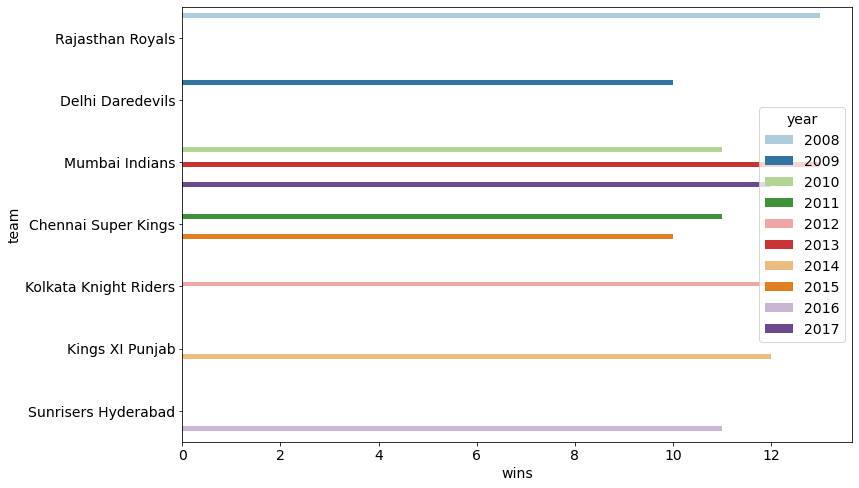

In [14]:
a = sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired')

The number of wins is a discrete value. Hence, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

Observations:

Mumbai Indians has secured the most wins in three seasons(2010, 2013 and 2017).

# The venue that hosted the maximum number of matches-

In [15]:
venue_ser = ipl['venue'].value_counts()

In [16]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

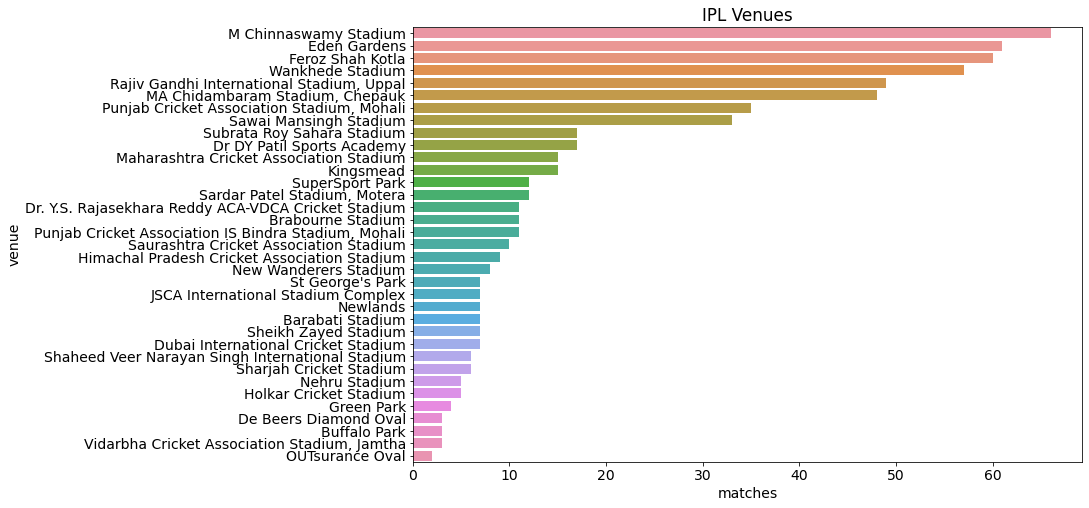

In [17]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [18]:
venue_df

,venue,matches
0,M Chinnaswamy Stadium,66
1,Eden Gardens,61
2,Feroz Shah Kotla,60
3,Wankhede Stadium,57
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,"Punjab Cricket Association Stadium, Mohali",35
7,Sawai Mansingh Stadium,33
8,Subrata Roy Sahara Stadium,17
9,Dr DY Patil Sports Academy,17


Observations:

1) M Chinnaswamy has hosted the maximum number of IPL matches followed by Eden Gardens and Feroz Shah Kotla till 2017.

2) Till 2017, IPL matches were hosted by 34 venues.

# The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.


In [19]:
team_wins_ser = ipl['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [20]:
team_wins_df

,team,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


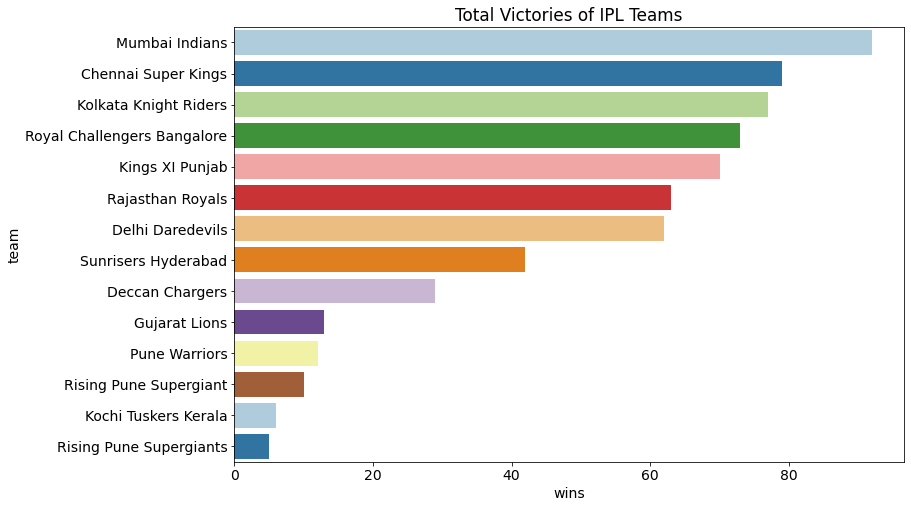

In [21]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

Observations:

Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches - 92) followed by Chennai Super Kings and Kolkata Knight Riders till 2017.

# Most Valuable Player

Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.

In [22]:
mvp_ser = ipl['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [23]:
mvp_ten_df

,player,wins
0,CH Gayle,18
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,15
4,SK Raina,14
5,RG Sharma,14
6,MS Dhoni,13
7,G Gambhir,13
8,AM Rahane,12
9,MEK Hussey,12


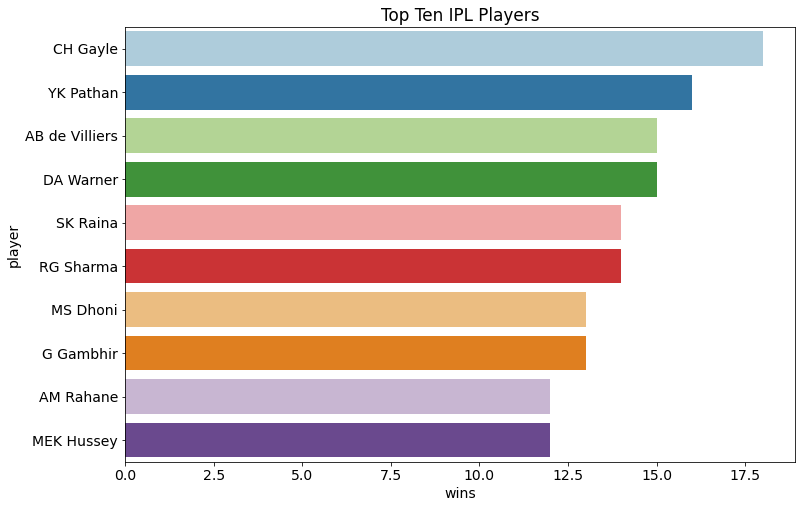

In [24]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

Observations:
    
1) Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.

2) Six Indian players have figured in the top ten IPL players list.

# The team that won the most number of toss

In [25]:
toss_ser = ipl['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

In [26]:
toss_df

,team,wins
0,Mumbai Indians,85
1,Kolkata Knight Riders,78
2,Delhi Daredevils,72
3,Royal Challengers Bangalore,70
4,Kings XI Punjab,68
5,Chennai Super Kings,66
6,Rajasthan Royals,63
7,Deccan Chargers,43
8,Sunrisers Hyderabad,35
9,Pune Warriors,20


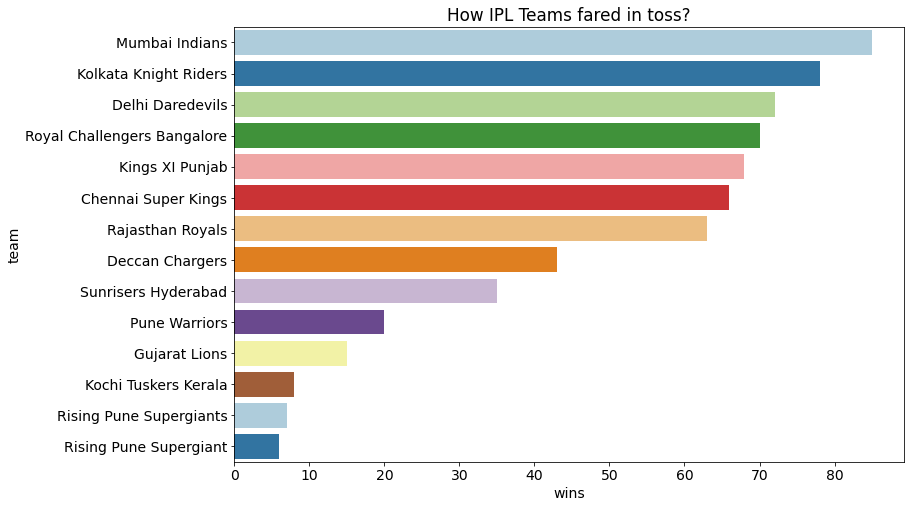

In [27]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

Observations:

1) Mumbai Indians has won the most toss(till 2017) in IPL history.

2) All the top teams in IPL are successful in winning the toss as well.

# Answering Questions :-

Let’s try to find answers to the questions that will linger in an IPL fan’s mind.

# Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top player — Chris Gayle has never won an IPL. Of the top ten players, some players(RG Sharma, MS Dhoni, DA Warner, SK Raina, and G Gambhir) have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.

In [28]:
mvp_ten_df

,player,wins
0,CH Gayle,18
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,15
4,SK Raina,14
5,RG Sharma,14
6,MS Dhoni,13
7,G Gambhir,13
8,AM Rahane,12
9,MEK Hussey,12


# Q2: Which umpire has officiated the most number of IPL matches on-field?

In [29]:
umpire1_ser = ipl['umpire1'].value_counts()
umpire2_ser = ipl['umpire2'].value_counts()

In [30]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
BF Bowden,37.0,NaN
S Ravi,36.0,49.0
BR Doctrove,34.0,8.0
M Erasmus,32.0,22.0
RE Koertzen,20.0,21.0
S Asnani,19.0,11.0


In [31]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True)

In [32]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
0,HDPK Dharmasena,87.0
5,S Ravi,85.0
2,AK Chaudhary,58.0
30,C Shamshuddin,56.0
42,SJA Taufel,55.0


Till 2017 HDPK Dharmasena has officiated the most number of IPL matches on-field, follower by S. Ravi(Sundaram Ravi).

# Q3: Which team is the most successful team in IPL?

Nothing succeeds like success. In a game of cricket, winning is everything. We have narrowed down on the list of teams that made the most number of wins in each season. The DataFrame win_per_season_df gives the required information. Mumbai Indians has secured the most wins till 2017 in three seasons(2010, 2013 and 2017). Mumbai Indians won the IPL trophy in 2013, 2015 and 2017.

In [33]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


Mumbai Indians secured the most number of wins(92) in IPL, followed by Chennai Super Kings.

In [34]:
team_wins_df

,team,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


Of all the IPL matches played till 2017, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in three seasons and have won three IPL trophies so far. Hence Mumbai Indians is the most successful team in IPL till 2017.

# Q4: Which city has hosted the maximum number of IPL matches?

In [35]:
ipl['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Cuttack            7
Port Elizabeth     7
Abu Dhabi          7
Ranchi             7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

In [36]:
city_ser = ipl['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

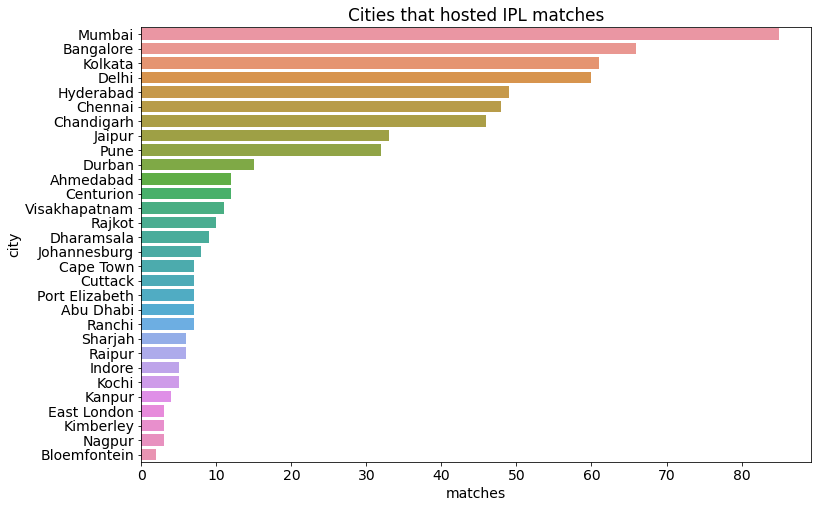

In [37]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

The city of Mumbai has hosted the maximum number of IPL matches.

# Q5: Does winning the toss has any advantage?

In [38]:
win_count = 0
for index, value in ipl.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipl)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 325
The probability of winning if won the toss: 0.51


The probability of winning when the team had won the toss is 51%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 311 instances when the team losing the toss has won the game.

# Q6: What are the major victories in IPL? Is it better to defend or chase in IPL?

In [39]:
len(ipl)

636

In [40]:
defend_vict_ser = ipl['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
42       1
40       1
36       1
87       1
      ... 
9        9
10       9
23       9
7        9
0      349
Name: win_by_runs, Length: 86, dtype: int64

Of the 636 IPL matches played from 2008 to 2017, 349 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.

When defending a total, the biggest victory was by 146 runs. Let’s find out that particular match.

In [41]:
score = 146
for index, row in ipl.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.

In [42]:
chasing_vict_ser = ipl['win_by_wickets'].value_counts()
chasing_vict_ser

0     297
7      70
6      68
5      57
8      48
4      34
9      32
3      15
10     10
2       4
1       1
Name: win_by_wickets, dtype: int64

Of the 636 IPL matches played from 2008 to 2017, 297 matches were won defending the total.

When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 10 such instances and we can find the details about those matches by the following code below:

In [43]:
for index, row in ipl.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                             4/7/2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [44]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,7,70
2,6,68
3,5,57
4,8,48
5,4,34
6,9,32
7,3,15
8,10,10
9,2,4
10,1,1


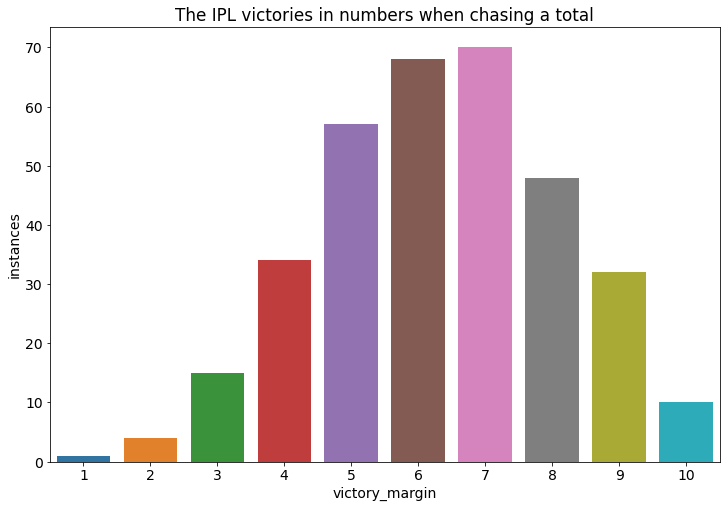

In [45]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

# Inferences and Conclusion

Let’s summarize the important observations we made during Exploratory Data Analysis:

1) Mumbai Indians is the most successful team in IPL.

2) Mumbai Indians has won the most number of toss.

3) There were more matches won by chasing the total(349 matches) than defending(297 matches).

4) When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

5) When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 10 such instances.

6) The Mumbai city has hosted the most number of IPL matches.

7) Chris Gayle has won the maximum number of player of the match title.

8) Winning toss gives a slight edge(51% probability of winning) against the opponents.

9) Six Indian players have figured in the top ten IPL players list.

10) HDPK Dharmasena has officiated the most number of IPL matches on-field.

11) M Chinnaswamy Stadium has hosted the maximum number of IPL matches.

12) Till 2017, 34 venues have hosted 636 IPL matches.

# THANK YOU